In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load customer profile data
df = pd.read_csv('merged.csv')

In [3]:
print(df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue     CustomerName         Region  SignupDate  \
0      300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36  Travis Campbell  South America  2024-04-11   
4      902.04    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category   Price PriceRange  
0  ComfortLiving Bluetooth Speaker  Electronics  300.68    300–400  
1  ComfortLiving Bluetooth Speaker  Electronics  300.68    300–400  

In [4]:
# Select relevant features for clustering
features = ['Quantity', 'TotalValue', 'Price']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

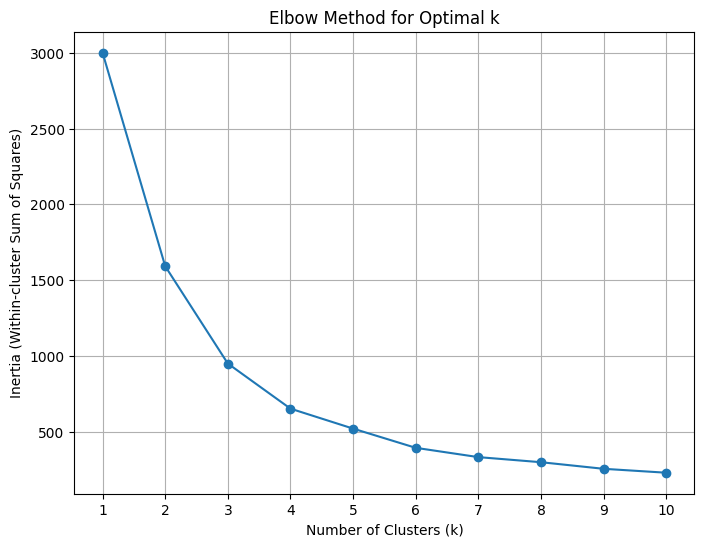

In [8]:
# Elbow method to determine the optimal number of clusters
inertia = []  
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(range(1, 11))  
plt.grid(True)
plt.show()


In [9]:
# Choose the number of clusters
n_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [10]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, df['Cluster'])

# Print DB Index
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.743702940359571


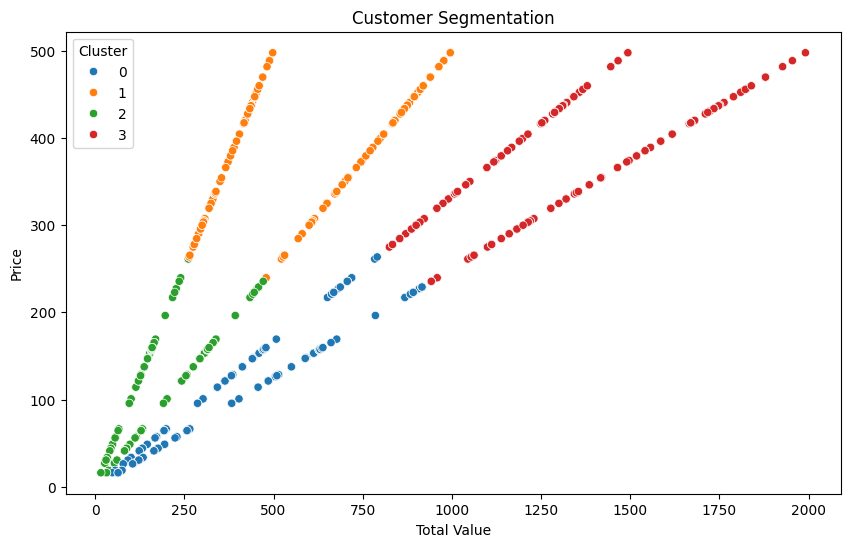

In [12]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Price', hue='Cluster', data=df, palette='tab10')
plt.title('Customer Segmentation')
plt.xlabel('Total Value')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

___

# Clustering Results Report

### Number of Clusters Formed
- **Number of Clusters**: 4 

### Clustering Metrics
- **Davies-Bouldin Index**: {0.743}
- The DBI value is approximately 0.743, which is relatively close to 0. This suggests that the clustering algorithm has done a good job of identifying well-separated and compact clusters

## Visual Representation of Clusters
- The scatter plot below shows the customer segmentation based on Total Value and Price.

![Customer Segmentation](img\cluster_img.png)

The scatter plot visualizes customer clusters based on "Total Value" (spending) and "Price" (of items purchased).  Each point is a customer, colored by cluster assignment.

### Clusters and Insights:

- Cluster 0 (Blue): Low Value, Low Price. These customers spend the least and tend to buy lower-priced items. They might be budget-conscious or infrequent buyers.
- Cluster 1 (Orange): High Value, High Price. These are your most valuable customers. They spend the most and purchase higher-priced items. Focus on retaining them with premium service and offerings.
- Cluster 2 (Green): Moderate Value, Low Price. These customers spend a moderate amount but favor lower-priced items. They could be price-sensitive but valuable due to volume. Consider promotions and bundles to increase their spending.
- Cluster 3 (Red): High Value, Moderate Price. These customers spend a lot but don't necessarily buy the most expensive items. They represent a good opportunity for upselling to higher-priced products.

### Summary:

The segmentation reveals four distinct customer groups based on spending and price preferences. Cluster 1 (orange) is the most valuable, while Cluster 0 (blue) represents budget-conscious buyers. Clusters 2 (green) and 3 (red) offer opportunities for increasing sales through targeted promotions and upselling.  Understanding these segments allows for tailored marketing strategies and improved customer relationship management.